## Example

Predict whether a customer go to a comedy show, based on series of data. 

### 1. Load Data

- `panda.read_csv()`

In [33]:
import pandas as pd

FILE_PATH = "./data_decision_tree.csv"
file_data = pd.read_csv(FILE_PATH)

# file_data.shape
# file_data.columns
# file_data.info()
# print(file_data)

file_data.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


### 2. Clean Data

- Missing data

- To make a decision tree, all data has to be numerical.
  - to convert the non numerical data into numerical values.
  - `pandas.map()`


In [34]:

# Convert nationality into numerical values
map_nationality = {'UK': 0, 'USA': 1, 'N': 2}
file_data['Nationality'] = file_data['Nationality'].map(map_nationality)

# Convert go into numerical values
map_go = {'YES': 1, 'NO': 0}
file_data['Go'] = file_data['Go'].map(map_go)

print(file_data)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


### 3. Split feature columns and the target column

- `feature column`: the columns with the values that target values are predicted from.

- `target column`: the column with the values that are to be predicted.


In [35]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

feature_list = file_data[features]
target_list = file_data['Go']

# print(feature_list)
# print(target_list)

### 4. Create Decision Tree Model and Fit Data

- `sklearn.tree.DecisionTreeClassifier()`: create a decision tree model object


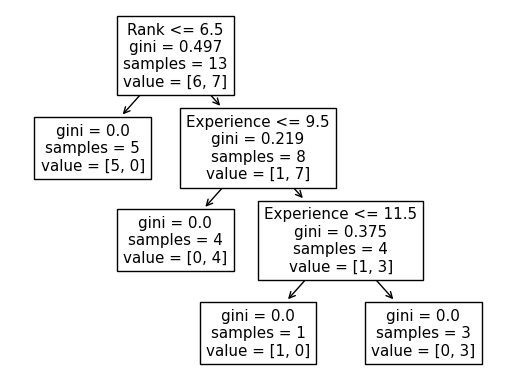

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt

predict_model = DecisionTreeClassifier()
predict_model = predict_model.fit(feature_list.values, target_list.values)

# sklearn.tree.plot_tree(): Plot a decision tree.
#   decision_tree: The decision tree to be plotted.
#   feature_names: Names of each of the features.
tree.plot_tree(predict_model, feature_names=features)

plt.show()


- Rank <= 6.5 means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

- gini = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.

- samples = 13 means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.

- value = [6, 7] means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".

### 5. Predict Values

- Predict whether a customer will to to a comedy ranking of 7, performed by a 40 years old American comedian with 10 years of experience.

In [37]:
predict_value = predict_model.predict([[40, 10, 7, 1]])

# print(predict_value)
print("Yes" if predict_value[0] else "No")      # No

No


- **Different Results**

  - The Decision Tree yields different results, even if model is fed with the same data.
  - That is because the Decision Tree does not give a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.
